#### MetaData - Prepared manually by taking the Fitness -https://royalsocietypublishing.org/doi/10.1098/rspb.2015.2292 & the allele count data and sequencing data - https://github.com/benjaminhgood/LTEE-metagenomic.

##### import libary

In [1]:
import sys
sys.path.append("../../..")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, fisher_exact
import utility, importlib
from scipy.stats import spearmanr
pd.set_option('mode.chained_assignment', None)

#### Read Fitness data from metadata

In [3]:
df_Fitness2_experimental = pd.read_excel("../../../data/MetaData_ecoli_final.xlsx", sheet_name="Fitness2_experimental")
df_Fitness2_experimental = df_Fitness2_experimental.rename(columns={'label ': 'label'})
df_Fitness2_experimental.head()

,Generation,Red.Pop,Fitness,Mutator.Ever,label
0,0,Ara - 1,0.910700,Yes,m1
1,500,Ara - 1,1.112534,Yes,m1
2,1000,Ara - 1,0.998220,Yes,m1
3,1500,Ara - 1,1.203381,Yes,m1
4,2000,Ara - 1,1.262659,Yes,m1


##### Check for duplicate 

In [4]:
df_Fitness2_experimental[df_Fitness2_experimental.duplicated()] # No duplicate row found

,Generation,Red.Pop,Fitness,Mutator.Ever,label


##### Read gain sheet data

In [5]:
df_Gain_calculated = pd.read_excel("../../../data/MetaData_ecoli_final.xlsx", sheet_name= "Gain score")
df_Gain_calculated.head()

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,accumulated_gain
0,63,intergenic,A->C,A,C,noncoding,p6,-10.385914
1,201,thrL,T->G,T,G,missense,p6,-1.750693
2,241,thrL,A->C,A,C,missense,m1,-0.911836
3,309,thrA,T->G,T,G,noncoding,m1,4.009052
4,322,thrA,A->G,A,G,noncoding,p3,1.532477


In [6]:
df_Gain_calculated[df_Gain_calculated.duplicated(subset=['Position', 'Gene',
 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'])]

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,accumulated_gain


##### Read Allele count and generation data from metasheet

In [7]:
df_Alt_allele_count_all_generation = pd.read_excel("../../../data/MetaData_ecoli_final.xlsx", sheet_name= "Mastersheet")
df_Alt_allele_count_all_generation.head()

,CHROM,Position,Gene,Allele,Annotation,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,...,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000,Ref_allele,Alt_allele,label
0,chrI,1554,thrA,C->A,missense,0,1,0,2,1.0,...,0,0,1.0,0.0,1.0,0.0,0.0,C,A,p1
1,chrI,1556,thrA,C->A,synonymous,0,0,0,2,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,A,p1
2,chrI,2450,thrA,G->T,synonymous,0,0,0,0,0.0,...,81,41,109.0,129.0,4.0,67.0,8.0,G,T,p1
3,chrI,4274,thrC,C->T,missense,0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,T,p1
4,chrI,6400,yaaA,T->G,missense,0,0,0,0,2.0,...,0,0,0.0,0.0,0.0,0.0,0.0,T,G,p1


##### Check if any duplicated row

In [8]:
df_Alt_allele_count_all_generation[df_Alt_allele_count_all_generation.duplicated(subset=['Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'])]

,CHROM,Position,Gene,Allele,Annotation,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,...,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000,Ref_allele,Alt_allele,label
2028,chrI,450000,ylaB,A->G,missense,0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,A,G,p3


##### delete duplicate row in df_Alt_allele_count_all_generation dataframe where duplicate indicate when ['CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'] are same in mutiple row


In [9]:
df_Alt_allele_count_all_generation.drop_duplicates(subset=['CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'], inplace=True)
df_Alt_allele_count_all_generation.reset_index(inplace=True, drop=True)
# df_Alt_allele_count_all_generation

In [10]:
df_Alt_allele_count_all_generation.head()

,CHROM,Position,Gene,Allele,Annotation,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,...,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000,Ref_allele,Alt_allele,label
0,chrI,1554,thrA,C->A,missense,0,1,0,2,1.0,...,0,0,1.0,0.0,1.0,0.0,0.0,C,A,p1
1,chrI,1556,thrA,C->A,synonymous,0,0,0,2,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,A,p1
2,chrI,2450,thrA,G->T,synonymous,0,0,0,0,0.0,...,81,41,109.0,129.0,4.0,67.0,8.0,G,T,p1
3,chrI,4274,thrC,C->T,missense,0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,T,p1
4,chrI,6400,yaaA,T->G,missense,0,0,0,0,2.0,...,0,0,0.0,0.0,0.0,0.0,0.0,T,G,p1


##### Read LLR Score

In [11]:
df_esm = pd.read_excel("../../../data/LLR.xlsx")
df_esm.head()

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,Start,End,Strand,...,has_space,WT_aa_made2,comparison2,Mut_aa_made,SNP,seq_id_x,universal_id,seq_id_y,mut_name,esm_score
0,241,thrL,A->C,A,C,missense,m1,190,255,+,...,False,MKRISTTITTTITITTGNGAG,True,MKRISTTITTTITITTGHGAG,N18H,241_thrL,241_thrL_N18H,241_thrL,N18H,-4.279933
1,1615,thrA,T->G,T,G,missense,m1,336,2798,+,...,False,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,True,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,I427S,1615_thrA,1615_thrA_I427S,1615_thrA,I427S,-11.530375
2,8430,talB,T->G,T,G,missense,m1,8236,9189,+,...,False,MTDKLTSLRQYTTVVADTGDIAAMKLYQPQDATTNPSLILNAAQIP...,True,MTDKLTSLRQYTTVVADTGDIAAMKLYQPQDATTNPSLILNAAQIP...,D65E,8430_talB,8430_talB_D65E,8430_talB,D65E,-5.331029
3,12527,dnaK,A->C,A,C,missense,m1,12161,14077,+,...,False,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,True,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,M123L,12527_dnaK,12527_dnaK_M123L,12527_dnaK,M123L,-4.669276
4,13974,dnaK,A->C,A,C,missense,m1,12161,14077,+,...,False,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,True,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,Q605P,13974_dnaK,13974_dnaK_Q605P,13974_dnaK,Q605P,-7.992450


##### Drop Duplicates if any in df_esm

In [12]:
df_esm_no_duplicates = df_esm[["Position",  "Gene", "label", "esm_score", "Allele"]].drop_duplicates(subset= ["Position",  "Gene", "label", "Allele"], keep='first')
df_esm_no_duplicates.dropna(inplace=True)
df_esm_no_duplicates.reset_index(inplace=True, drop=True)
df_esm_no_duplicates.head()

,Position,Gene,label,esm_score,Allele
0,241,thrL,m1,-4.279933,A->C
1,1615,thrA,m1,-11.530375,T->G
2,8430,talB,m1,-5.331029,T->G
3,12527,dnaK,m1,-4.669276,A->C
4,13974,dnaK,m1,-7.992450,A->C


##### Merge Gain score and LLR score 

In [13]:
df_complete = pd.merge(df_Gain_calculated,df_Alt_allele_count_all_generation, on=['Position','Gene','Allele','Annotation','Ref_allele','Alt_allele','label'], how = "left")
df_complete.head()

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,accumulated_gain,CHROM,AC:0,...,AC:55500,AC:56000,AC:56500,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000
0,63,intergenic,A->C,A,C,noncoding,p6,-10.385914,chrI,0,...,49,78,45,22,36,39.0,11.0,1.0,1.0,6.0
1,201,thrL,T->G,T,G,missense,p6,-1.750693,chrI,0,...,100,140,93,28,79,62.0,15.0,3.0,0.0,13.0
2,241,thrL,A->C,A,C,missense,m1,-0.911836,chrI,0,...,6,1,2,0,0,0.0,0.0,0.0,0.0,0.0
3,309,thrA,T->G,T,G,noncoding,m1,4.009052,chrI,0,...,0,0,0,0,0,0.0,1.0,2.0,7.0,9.0
4,322,thrA,A->G,A,G,noncoding,p3,1.532477,chrI,0,...,23,24,13,16,26,8.0,30.0,22.0,23.0,0.0


##### Extract the column relavent for current analysis from allele count dataframe (all the generation wise allele count, 'CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label')


In [14]:
filtered_list = [item for item in df_complete if item.startswith("AC")] ## Fiter the column starting with "AC" which indicate allele count
filtered_list.extend(['CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label', "accumulated_gain"]) ##Add other relavent information
df_allele_generation = df_complete[filtered_list]
df_allele_generation.head() # Get complete dataframe containing all generation wise allele count and other relavent column

,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,AC:3000,AC:4000,AC:4500,AC:5000,AC:5500,...,AC:60000,CHROM,Position,Gene,Allele,Annotation,Ref_allele,Alt_allele,label,accumulated_gain
0,0,0,0,0,0.0,0,0,0,0,0,...,6.0,chrI,63,intergenic,A->C,noncoding,A,C,p6,-10.385914
1,0,0,0,0,0.0,0,0,0,0,0,...,13.0,chrI,201,thrL,T->G,missense,T,G,p6,-1.750693
2,0,0,0,0,0.0,0,0,0,0,0,...,0.0,chrI,241,thrL,A->C,missense,A,C,m1,-0.911836
3,0,0,0,0,0.0,0,0,0,0,0,...,9.0,chrI,309,thrA,T->G,noncoding,T,G,m1,4.009052
4,0,0,0,0,0.0,0,0,0,0,0,...,0.0,chrI,322,thrA,A->G,noncoding,A,G,p3,1.532477


##### Define mutator and non-mutator population 

In [15]:
mutator_list = ['m1', 'm2', 'm3', 'm4', 'p3', 'p6']
non_mutator_list = ['p1', 'p2', 'p4', 'p5', 'm5', 'm6']

##### Population wise mutation count (fig - 2c)

In [16]:
print("The number of mutation present population wise :")
df_complete["label"].value_counts()

The number of mutation present population wise :


label
p6    11257
p3     5967
m1     4994
m4     4953
m2     3398
m3     3215
p1      957
m5      600
m6      475
p4      420
p5      355
p2      331
Name: count, dtype: int64

##### Find the generation which have missing value 

In [17]:
nan_columns = df_allele_generation.columns[df_allele_generation.isna().any()]
df_with_nan = df_allele_generation[nan_columns]
nan_counts = df_allele_generation.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
print("\n Number of NaN values in each column:")
print(nan_counts)


 Number of NaN values in each column:
AC:2500      355
AC:15000    4953
AC:46500     331
AC:58000    3753
AC:58500     355
AC:59000     355
AC:59500     355
AC:60000     355
dtype: int64


##### Drop the generation having nan values

In [18]:
df_allele_generation.drop(nan_counts.index.tolist(), axis = 1, inplace=True)
df_allele_generation.reset_index(inplace=True, drop = True)
df_allele_generation.head()

,AC:0,AC:1000,AC:1500,AC:2000,AC:3000,AC:4000,AC:4500,AC:5000,AC:5500,AC:6000,...,AC:57500,CHROM,Position,Gene,Allele,Annotation,Ref_allele,Alt_allele,label,accumulated_gain
0,0,0,0,0,0,0,0,0,0,0,...,36,chrI,63,intergenic,A->C,noncoding,A,C,p6,-10.385914
1,0,0,0,0,0,0,0,0,0,0,...,79,chrI,201,thrL,T->G,missense,T,G,p6,-1.750693
2,0,0,0,0,0,0,0,0,0,0,...,0,chrI,241,thrL,A->C,missense,A,C,m1,-0.911836
3,0,0,0,0,0,0,0,0,0,0,...,0,chrI,309,thrA,T->G,noncoding,T,G,m1,4.009052
4,0,0,0,0,0,0,0,0,0,0,...,26,chrI,322,thrA,A->G,noncoding,A,G,p3,1.532477


##### Create dataset having all mutation info in proper form for easy calculation
##### Make a dataframe having column ['label', 'CHROM', 'Position', 'Gene', 'Allele', 'Annotation', 'generation', 'allele count', 'generation_number']

In [19]:
data_all_copy = df_allele_generation.copy()
all_mutation = pd.DataFrame() # The all_mutation dataframe contain generation and population wise accumulated gain

for i in data_all_copy.columns[:-9]:
    new_df_tmp = pd.DataFrame()
    new_df = data_all_copy[data_all_copy.loc[:, i]!=0]
    new_df_tmp = new_df[["label", 'CHROM', 'Position', 'Gene', 'Allele', 'Annotation']]
    new_df_tmp.loc[:, "generation"] = i
    new_df_tmp.loc[:, "AG"] = new_df.loc[:, "accumulated_gain"]
    new_df_tmp.loc[:, "allele count"] = new_df.loc[:, i]
    all_mutation = pd.concat([all_mutation, new_df_tmp], axis = 0)
    
    
all_mutation.reset_index(inplace=True, drop=True)
all_mutation['generation_number'] = all_mutation['generation'].str.extract(r'(\d+)').astype(int)
for i in range(all_mutation.shape[0]):
    
    if all_mutation.loc[i, "label"] in mutator_list:
        all_mutation.loc[i, "mutator"] = "mutator"
    if all_mutation.loc[i, "label"] in non_mutator_list:
        all_mutation.loc[i, "mutator"] = "non mutator"

all_mutation.head()

,label,CHROM,Position,Gene,Allele,Annotation,generation,AG,allele count,generation_number,mutator
0,m6,chrI,1457,thrA,G->A,missense,AC:0,-8.160701,1,0,non mutator
1,m2,chrI,2098,thrA,A->G,missense,AC:0,0.007780,1,0,mutator
2,m2,chrI,2942,thrB,A->G,missense,AC:0,-4.953477,1,0,mutator
3,m4,chrI,5437,yaaX,A->G,missense,AC:0,-10.279634,1,0,mutator
4,m5,chrI,7129,yaaJ,A->C,missense,AC:0,2.182288,2,0,non mutator


##### Remove white spaces from columns

In [20]:
df_esm_no_duplicates["Gene"] = df_esm_no_duplicates["Gene"].str.strip()
all_mutation["Gene"] = all_mutation["Gene"].str.strip()
df_esm_no_duplicates["Allele"] = df_esm_no_duplicates["Allele"].str.strip()
all_mutation["Allele"] = all_mutation["Allele"].str.strip()

##### Merge LLR score with Allele count

In [21]:
all_mutation_with_esm_1b_score = pd.merge(all_mutation, df_esm_no_duplicates, on = ["label", 'Position', "Gene", 'Allele'], how="left")
all_mutation_with_esm_1b_score_drop_na = all_mutation_with_esm_1b_score.dropna(subset=["esm_score"])    ##### drop the row where esm score is not available
all_mutation_with_esm_1b_score_drop_na.reset_index(inplace=True, drop=True)
all_mutation_with_esm_1b_score_drop_na.head()

,label,CHROM,Position,Gene,Allele,Annotation,generation,AG,allele count,generation_number,mutator,esm_score
0,m6,chrI,1457,thrA,G->A,missense,AC:0,-8.160701,1,0,non mutator,-3.043034
1,m2,chrI,2098,thrA,A->G,missense,AC:0,0.007780,1,0,mutator,-9.017883
2,m2,chrI,2942,thrB,A->G,missense,AC:0,-4.953477,1,0,mutator,-2.160521
3,m4,chrI,5437,yaaX,A->G,missense,AC:0,-10.279634,1,0,mutator,-3.740739
4,m5,chrI,7129,yaaJ,A->C,missense,AC:0,2.182288,2,0,non mutator,-6.933856


In [22]:
grouped_gen_2K_median_ag = utility.return_generation_grouped_dataframe_with_one_sided_p(all_mutation, column_name = "AG", gen_cut_off = 2000, cut_off_string1 =  "<=2K", cut_off_string2 = ">2K")

The one sided man_whiteney p value within the mutator groups for data points >2K and <=2K generation w.r.t AG score is:  0.0004367866493461707
The one sided man_whiteney p value within the non mutator groups for data points >2K and <=2K w.r.t  AG score is:  0.8599797354349099


In [23]:
grouped_gen_2K_median_ag

,generation_number,mutator,AG,group_gen
0,0,mutator,-4.254193,<=2K
1,0,non mutator,-5.520088,<=2K
2,1000,mutator,-3.945546,<=2K
3,1000,non mutator,-3.781345,<=2K
4,1500,mutator,-3.421817,<=2K
...,...,...,...,...
213,56500,non mutator,-4.237682,>2K
214,57000,mutator,-3.196643,>2K
215,57000,non mutator,-4.154128,>2K
216,57500,mutator,-3.226256,>2K


##### figure 1g. Median kGain vs mutator type with 2k generation as cut off

P-value = 4.37e-04 and effect size = 8.51e+00 for mutator,
P-value = 8.60e-01 and effect size = -1.67e+00 for non mutator,
The median effect size is : 3.4207012612125363


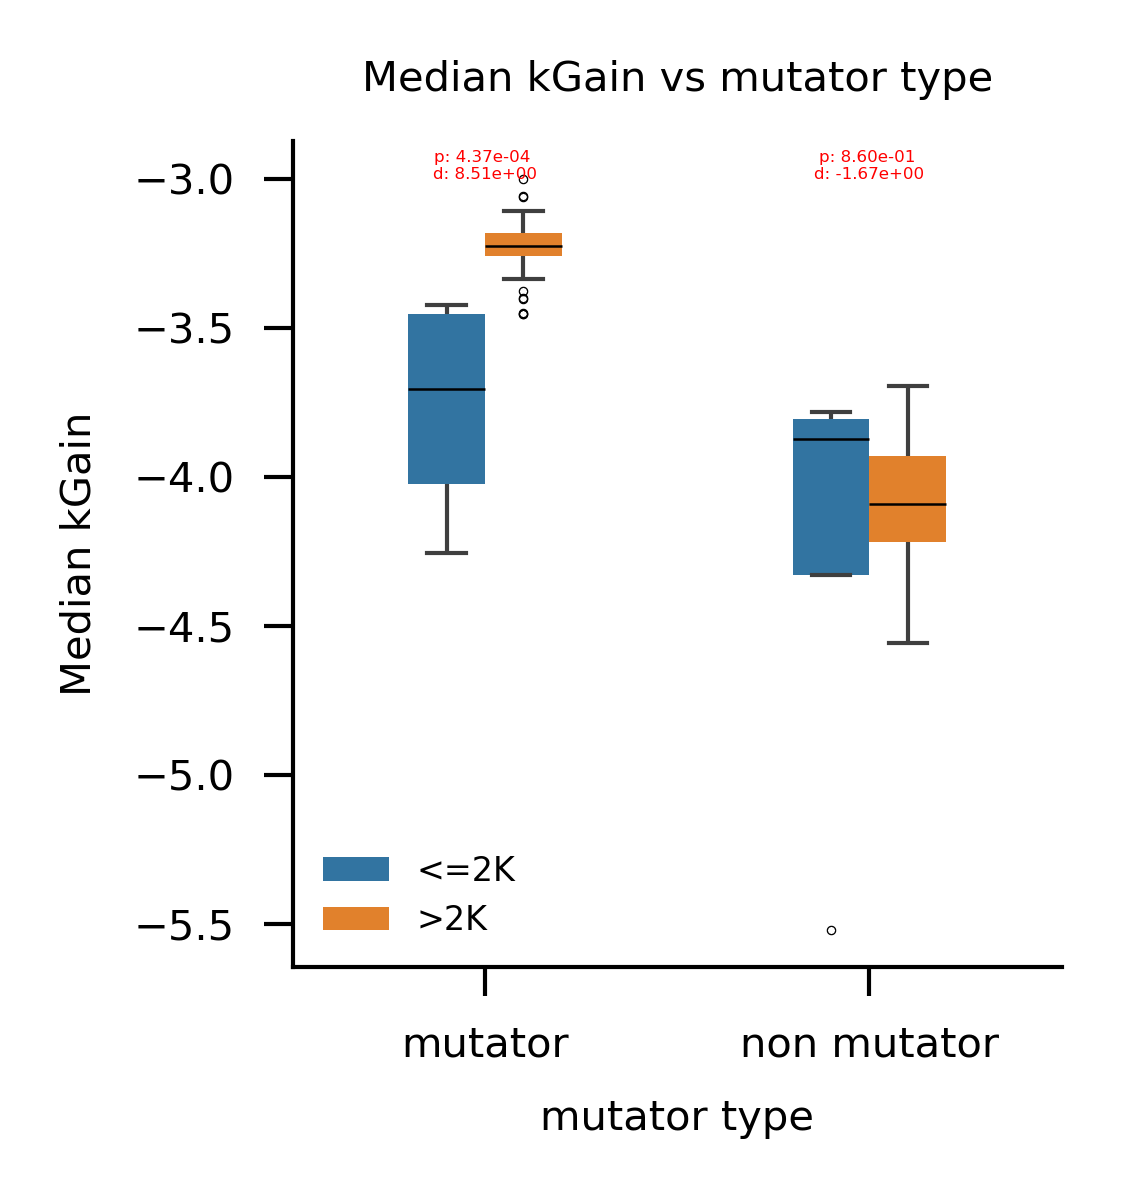

In [24]:
fig, ax = plt.subplots(1, 1 , dpi = 600, figsize = (2.1, 2.1))
# sns.set_palette(sns.color_palette('deep'))
ax= sns.boxplot(data=grouped_gen_2K_median_ag, x = "mutator", y = "AG", hue= "group_gen", dodge=20, ax = ax, boxprops=dict(edgecolor="black", linewidth=0),flierprops=dict(marker='o', markeredgecolor='black'), width=0.4,linewidth=0.5, fliersize=0.15, medianprops={"color": "black","linewidth":0.3})
ax.legend(fontsize=4, frameon=False)
# Add p-values as text annotations on the figure
# ax.text(0, -4.7, f"p = {p_mutator:.3g}", ha='center', fontsize=5, color='black')
# ax.text(1, -3.2, f"p = {p_non_mutator:.3g}", ha='center', fontsize=5, color='black')
plt.tight_layout()
ax = utility.custom_figure_axis(ax, fontsize=5, show_ticks = True, rotation=0)
ax.set_ylabel("Median kGain")
ax.set_xlabel("mutator type")
ax.set_title("Median kGain vs mutator type", fontsize = 5)
ax = utility.return_box_with_p_effect_size(ax, data = grouped_gen_2K_median_ag, x_columns = 'mutator', y_columns = 'AG', group1_name = '>2K', group2_name = '<=2K', y_pos = -3, hue_columns="group_gen", fontsize=2)

#plt.savefig("../figure/Median AG vs type in ecoli with 2k gen as cutoff.pdf", dpi = 600, bbox_inches="tight")

##### kGain score vs population (fig -s1(h))

Text(0, 0.5, 'kGain')

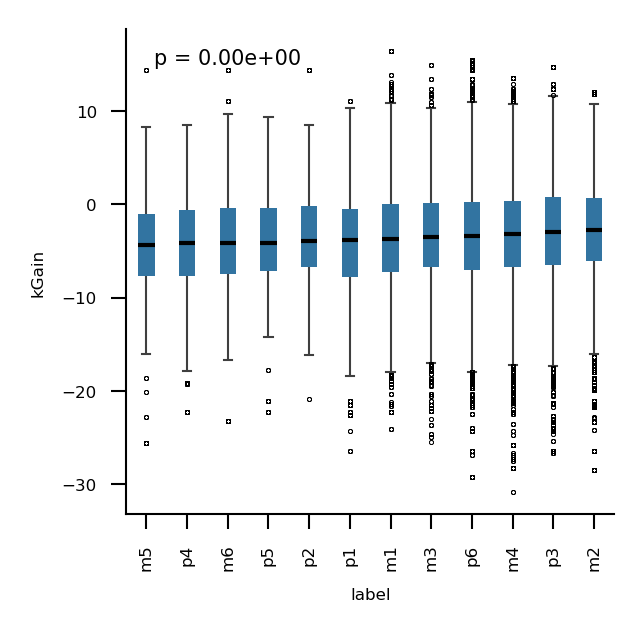

In [25]:
p_kgain = utility.man_whiteney(all_mutation[all_mutation["label"].isin(mutator_list)]["AG"], all_mutation[all_mutation["label"].isin(non_mutator_list)]["AG"])
fig, ax = plt.subplots(1, 1, dpi = 300, figsize =(2.1,2.1))
ax = utility.box_plot(data= all_mutation, x = 'label', y = 'AG', ax = ax)
ax = utility.custom_figure_axis(ax, fontsize=4, show_ticks = True)
ax.text(2, 15, f"p = {p_kgain:.2e}", ha='center', fontsize=5, color='black')
ax.set_ylabel("kGain")

##### LLR score vs population (fig -s1(i))

In [26]:
# df_gene_type_llr = all_mutation_with_esm_1b_score_drop_na.drop_duplicates(subset = ['label', 'CHROM', 'Position', 'Gene', 'Allele', "Annotation"])

Text(0, 0.5, 'LLR')

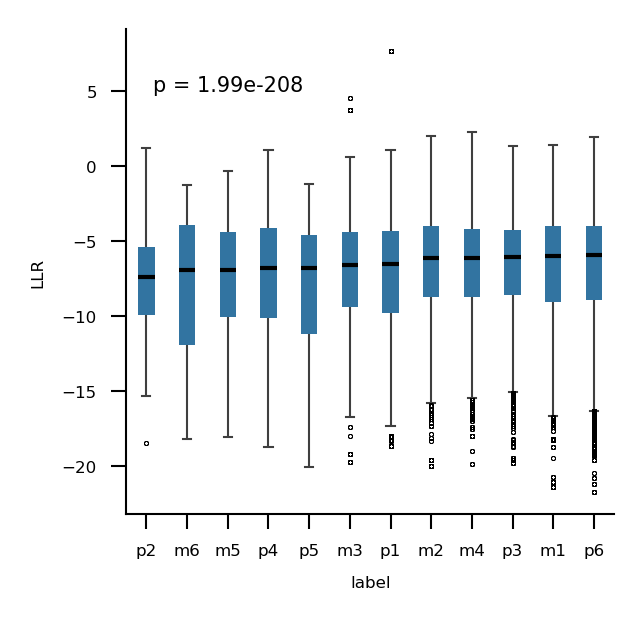

In [30]:
p_llr = utility.man_whiteney(all_mutation_with_esm_1b_score_drop_na[all_mutation_with_esm_1b_score_drop_na["label"].isin(mutator_list)]["esm_score"], all_mutation_with_esm_1b_score_drop_na[all_mutation_with_esm_1b_score_drop_na["label"].isin(non_mutator_list)]["esm_score"])
fig, ax = plt.subplots(1, 1, dpi = 300, figsize =(2.1,2.1))
ax = utility.box_plot(data= all_mutation_with_esm_1b_score_drop_na, x = 'label', y = 'esm_score', ax = ax)
ax = utility.custom_figure_axis(ax, fontsize=4, show_ticks = True, rotation=0)
ax.text(2, 5, f"p = {p_llr:.2e}", ha='center', fontsize= 5, color='black')
ax.set_ylabel("LLR")

##### fig 1j. kGain vs allele stability

/tmp/ipykernel_1384742/1010099479.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_allele_generation, x="allele_stability_type", y="accumulated_gain", order=median_order, linewidth=0.5, inner='box', palette=['lime'])
/tmp/ipykernel_1384742/1010099479.py:15: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.violinplot(data=df_allele_generation, x="allele_stability_type", y="accumulated_gain", order=median_order, linewidth=0.5, inner='box', palette=['lime'])
/tmp/ipykernel_1384742/1010099479.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


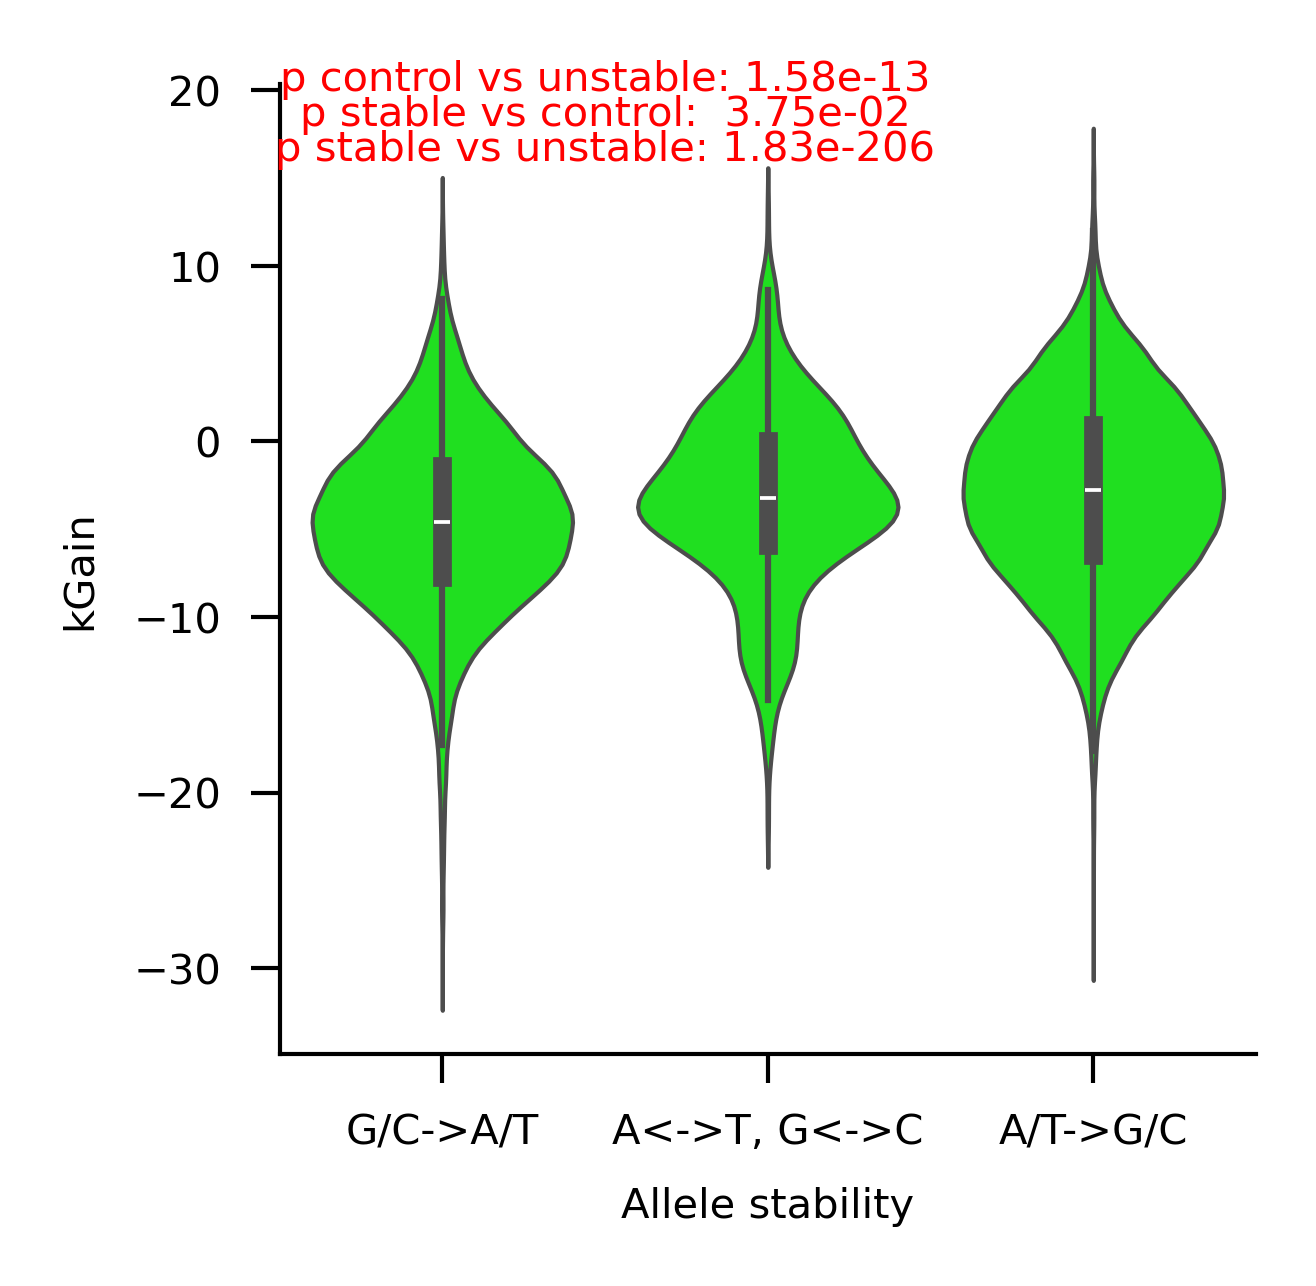

In [29]:

df_allele_generation["Allele"] = df_allele_generation["Allele"].str.strip()
# df_allele_generation[df_allele_generation["Allele"].isin(["A->T", "G->C"])]["type_a"] = "control"
df_allele_generation.loc[df_allele_generation["Allele"].isin(["A->T", "G->C", "T->A", "C->G"]), "allele_stability_type"] = "control"
df_allele_generation.loc[df_allele_generation["Allele"].isin(["G->T", "G->A", "C->T", "C->A"]), "allele_stability_type"] = "unstable"
df_allele_generation.loc[df_allele_generation["Allele"].isin(["A->G", "A->C", "T->G", "T->C"]), "allele_stability_type"] = "stable"

p_stable_vs_control = utility.man_whiteney(df_allele_generation[df_allele_generation["allele_stability_type"].isin(["stable"])]["accumulated_gain"], df_allele_generation[df_allele_generation["allele_stability_type"].isin(["control"])]["accumulated_gain"])
p_stable_vs_unstable = utility.man_whiteney(df_allele_generation[df_allele_generation["allele_stability_type"].isin(["stable"])]["accumulated_gain"], df_allele_generation[df_allele_generation["allele_stability_type"].isin(["unstable"])]["accumulated_gain"])
p_control_vs_unstable = utility.man_whiteney(df_allele_generation[df_allele_generation["allele_stability_type"].isin(["control"])]["accumulated_gain"], df_allele_generation[df_allele_generation["allele_stability_type"].isin(["unstable"])]["accumulated_gain"])


fig, ax = plt.subplots(1,1, figsize= (2.1, 2.1), dpi = 600)
median_order = df_allele_generation.groupby("allele_stability_type")["accumulated_gain"].median().sort_values().index
# ax = sns.violinplot(data = df_allele_generation, x = "type_a", y= "accumulated_gain", ax=ax)
ax = sns.violinplot(data=df_allele_generation, x="allele_stability_type", y="accumulated_gain", order=median_order, linewidth=0.5, inner='box', palette=['lime'])
ax.set_ylabel("kGain")
ax.set_xlabel("Allele stability")

ax.text(0.5, 20, f"p control vs unstable: {p_control_vs_unstable:.2e}", ha="center", fontsize=5, color="red")
ax.text(0.5, 18, f"p stable vs control:  {p_stable_vs_control:.2e}", ha="center", fontsize=5, color="red")

ax.text(0.5, 16, f"p stable vs unstable: {p_stable_vs_unstable:.2e}", ha="center", fontsize=5, color="red")
# ax.set_xticklabels(["Control", "Unstable", "Stable"])
# Get current labels
labels = [label.get_text() for label in ax.get_xticklabels()]
labels[0] = "G/C->A/T"  # Change the second label
labels[1] = "A<->T, G<->C"  # Change the second label
labels[2] = "A/T->G/C"  # Change the second label

# Apply new labels
ax.set_xticklabels(labels)
ax = utility.custom_figure_axis(ax, fontsize = 5, rotation = 0)

# plt.savefig("allele stability type vs AG.pdf", dpi = 600)
